In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
import keras
keras.backend.backend()

'tensorflow'

In [57]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [58]:
x_train.shape

(60000, 28, 28)

In [59]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

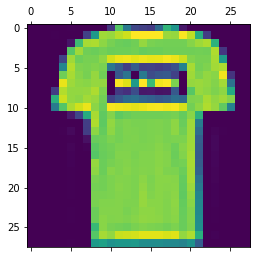

In [60]:
plt.matshow(x_train[1])

In [61]:
y_train[1]

0

In [62]:
x_train = x_train/255
x_test = x_test/255

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [64]:
model = Sequential()

In [65]:
model.add(Flatten(input_shape=[28, 28]))  #flatten convert 2D array into 1D array
#input layer
model.add(Dense(200, activation='relu'))  ## Hidden layer
model.add(Dense(10, activation='softmax'))

In mathematics, the softmax function, also known as softargmax[1] or normalized exponential function,[2]:198 is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers.

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss="sparse_categorical_crossentropy",   ##loss function
             optimizer="adam",    ## IS AN ALGORITHM THAT helps you adjust the
                                  #weights of the edges as you doing the training
             metrics=["accuracy"])


In [68]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.4853 - accuracy: 0.8284
Epoch 2/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.3658 - accuracy: 0.8672
Epoch 3/5
60000/60000 [==============================] - 13s 213us/step - loss: 0.3295 - accuracy: 0.8803
Epoch 4/5
60000/60000 [==============================] - 35s 581us/step - loss: 0.3056 - accuracy: 0.8866
Epoch 5/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.2881 - accuracy: 0.8939


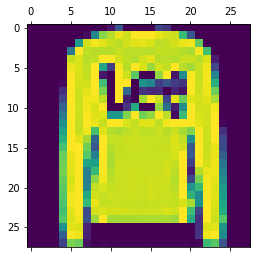

In [69]:
plt.matshow(x_test[1])

In [70]:
x_test.shape

(10000, 28, 28)

In [71]:
yp = model.predict(x_test)

In [72]:
yp[1]

array([4.8663355e-06, 1.7079225e-11, 9.9926525e-01, 6.2515253e-12,
       5.9645600e-04, 5.2599692e-11, 1.3341938e-04, 1.1309714e-11,
       1.3054752e-10, 3.6020002e-12], dtype=float32)

In [73]:
np.argmax(yp[1])

2

In [74]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 75us/step


[0.3462948365986347, 0.8741999864578247]